In [1]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# import zipfile

# filename = "/homes/imransharif/Mehwish/Dataset/Combined_dataset.zip"

# with zipfile.ZipFile(filename, 'r') as zip_ref:
#     zip_ref.extractall()
#     print('Done')


In [4]:

import os
!pip install keras-preprocessing
!pip install scikit-image
import tensorflow as tf
import time
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

#from tqdm import tqdm_notebook, tnrange
from itertools import chain
# from skimage.io import imread, imshow, concatenate_images
# from skimage.transform import resize
# from skimage.morphology import label
from sklearn.model_selection import train_test_split
# import imageio

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Resizing
from keras.layers import Lambda, RepeatVector, Reshape
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D, GlobalMaxPool2D, AveragePooling2D
from keras.regularizers import l2
#from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
#from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.losses import *
from keras import backend as keras

from keras.utils import plot_model

from keras_preprocessing.image import array_to_img, img_to_array, load_img
import cv2
# import skimage.io as io

import glob
from PIL import Image
# import skimage
from keras.initializers import Constant

# from skimage.morphology import disk
from sklearn.metrics import confusion_matrix
# from skimage.measure import label, regionprops
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import jaccard_score

from keras import backend as K
from keras import layers, models
import zipfile
import random
import sys

# import skimage.io                           #Used for imshow function
# import skimage.transform                    #Used for resize function
# from skimage.morphology import label        #Used for Run-Length-Encoding RLE to create final submission
import matplotlib.pyplot as plt
from keras.layers import Concatenate, add

import warnings
warnings.filterwarnings("ignore")
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
from keras.losses import binary_crossentropy
from sklearn.metrics import precision_recall_curve

/opt/software/software/Python/3.10.4-GCCcore-11.3.0/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.7 requires typing-extensions>=4.9.0, but you have typing-extensions 4.3.0 which is incompatible.
gcvit-tensorflow 1.2.1 requires absl-py==

In [6]:
from keras import backend as K

from scipy.ndimage import distance_transform_edt as distance
from keras.losses import binary_crossentropy
def dice_coef(y_true, y_pred,smooth = 10):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def Jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection ) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection)

def Jaccard_coef_loss(y_true, y_pred):
    return (1-Jaccard_coef(y_true, y_pred))

# def bcc_Jaccard_coef_loss(y_true, y_pred):
#     return (binary_crossentropy(y_true, y_pred)+(1-Jaccard_coef(y_true, y_pred)))

#Metrices
# from keras import backend as K
import tensorflow as tf
import keras

import tensorflow.keras.backend as K  # Import the correct backend

# ... (rest of your code)

def iou(y_true, y_pred, threshold=0.5):
    y_pred = threshold_binarize(y_pred, threshold)
    y_true_f = K.flatten(y_true)  # Now use K.flatten from tensorflow.keras.backend
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)

import keras.backend as K  # Make sure to import Keras backend

def dice_coef(y_true, y_pred, threshold=0.5):
    y_pred = threshold_binarize(y_pred, threshold)
    y_true_f = K.flatten(y_true)  # Now use K.flatten
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    # ... rest of your dice_coef function ...
    return (2. * intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))

def sensitivity(y_train, results):
    true_positives = K.sum(K.round(K.clip(y_train * results, 0, 1)))
    actual_positives = K.sum(K.round(K.clip(y_train, 0, 1)))
    sensitivity = true_positives / (actual_positives + K.epsilon())
    return sensitivity

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

def threshold_binarize(x, threshold=0.5):
    ge = tf.greater_equal(x, tf.constant(threshold))
    y = tf.where(ge, x=tf.ones_like(x), y=tf.zeros_like(x))
    return y

def DiceLoss(y_true, y_pred, smooth=1e-6):
    y_true, y_pred = tf.cast(y_true, dtype=tf.float32), tf.cast(y_pred, tf.float32)
    nominator = 2 * tf.reduce_sum(tf.multiply(y_pred, y_true)) + smooth
    denominator = tf.reduce_sum(y_pred ** 2) + tf.reduce_sum(y_true ** 2) + smooth
    result = 1 - tf.divide(nominator, denominator)
    return result



# def bcc_Jaccard_coef_loss(y_true, y_pred):
#     return (DiceLoss(y_true, y_pred, smooth=1e-6)+(1-iou(y_true, y_pred, threshold=0.5)))


def bcc_Jaccard_coef_loss(y_true, y_pred):
    iou_value = iou(y_true, y_pred, threshold=0.5)  # Calculate IoU
    print("IoU value:", iou_value)  # Print the IoU value
    return (DiceLoss(y_true, y_pred, smooth=1e-6)+(1-iou_value))


In [7]:
def focal_modulation_block(inputs, gamma=2.0, alpha=0.25):
    # Get the number of channels in the input tensor
    num_channels = inputs.shape[-1]

    # Channel-wise mean calculation
    mean = layers.GlobalAveragePooling2D()(inputs)

    # Channel-wise max calculation
    max_val = layers.GlobalMaxPooling2D()(inputs)

    # Calculate the modulation factor for each channel
    modulation = (max_val - mean) * alpha

    # Apply the focal modulation to the input tensor
    modulation = layers.Reshape((1, 1, num_channels))(modulation)
    modulation = layers.Conv2D(filters=num_channels, kernel_size=1, activation='sigmoid')(modulation)

    # Scale the input tensor by the modulation factor
    scaled_inputs = layers.Multiply()([inputs, modulation])

    # Apply gamma power to the scaled inputs
    outputs = layers.Lambda(lambda x: x ** gamma)(scaled_inputs)

    return outputs
def focal_modulation_context_aggregation_block(inputs, filters):
    filters = int(filters)
    
    # Apply multiple convolution layers with different receptive fields
    conv1 = layers.Conv2D(filters, kernel_size=1, padding='same', activation='relu')(inputs)
    conv2 = layers.Conv2D(filters, kernel_size=3, padding='same', activation='relu')(inputs)
    conv3 = layers.Conv2D(filters, kernel_size=5, padding='same', activation='relu')(inputs)
    
    # Apply gating mechanism (point-wise multiplication)
    gate1 = layers.Conv2D(filters, kernel_size=1, activation='sigmoid')(inputs)
    gate2 = layers.Conv2D(filters, kernel_size=1, activation='sigmoid')(inputs)
    gate3 = layers.Conv2D(filters, kernel_size=1, activation='sigmoid')(inputs)
    
    gated_conv1 = layers.Multiply()([conv1, gate1])
    gated_conv2 = layers.Multiply()([conv2, gate2])
    gated_conv3 = layers.Multiply()([conv3, gate3])
    
    # Aggregate context (addition)
    context_aggregation = layers.Add()([gated_conv1, gated_conv2, gated_conv3])
    
    # Apply focal modulation block (represented here as a placeholder function)
    focal_modulation = focal_modulation_block(context_aggregation)
    
    # Query and Modulator interaction
    query = layers.Conv2D(filters, kernel_size=1, activation='relu')(inputs)
    modulator = layers.Conv2D(filters, kernel_size=1, activation='relu')(focal_modulation)
    interaction = layers.Multiply()([query, modulator])
    
    # Final addition
    output = layers.Add()([inputs, interaction])
    
    return output

In [8]:
#  import numpy as np
def ana_attention_block(inputs,n_classes,k):
    shape=K.int_shape(inputs)
    # F=Conv2D(k*n_classes,1, padding='same') (inputs)
    F=Conv2D(k*n_classes,3, padding='same') (inputs)
    F=BatchNormalization() (F)
    F1=Activation('relu') (F)

    F2=F1

    x1=GlobalMaxPool2D()(F2)
    x2=GlobalAveragePooling2D()(F2)
    x = Multiply() ([x1,x2])
    x=Reshape((n_classes,k))(x)
    S=Lambda(lambda x: K.mean(x,axis=-1,keepdims=False)) (x)

    # x2=Reshape((n_classes,k)) (x)
    # S2=Lambda(lambda x: K.mean(x,axis=-1,keepdims=False))  (x2)
    # S= S1+S2
    x=Reshape((shape[1],shape[2],n_classes,k)) (F1)
    x=Lambda(lambda x: K.mean(x,axis=-1,keepdims=False))  (x)
    x=Multiply()([S,x])
    M=Lambda(lambda x: K.mean(x,axis=-1,keepdims=True))  (x)

    semantic=Multiply()([inputs,M])
    return semantic


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(input, out_channels, dropout_rate=0):
    # Multi-scale convolutions
    conv1x1 = layers.Conv2D(out_channels, kernel_size=1, padding='same', use_bias=False)(input)
    conv3x3 = layers.Conv2D(out_channels, kernel_size=3, padding='same', use_bias=False)(input)
    conv3x3_dilated = layers.Conv2D(out_channels, kernel_size=3, padding='same', use_bias=False, dilation_rate=2)(input)
    
    # Fuse multi-scale outputs by summing them
    x = conv1x1 + conv3x3 + conv3x3_dilated
    
    # Apply Batch Normalization, Dropout, and Activation after fusion
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    
    # Second set of regular convolutions
    x = layers.Conv2D(out_channels, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    
    return x


def up_block(input, out_channels):
    x = layers.Conv2DTranspose(out_channels, kernel_size=2, strides=2, padding='same', use_bias=False)(input)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    return x

def down_block(input, out_channels):
    x = layers.Conv2D(out_channels, kernel_size=2, strides=2, padding='same', use_bias=False)(input)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    return x

def build_FR_UNet(input_shape, num_classes, feature_scale=2, dropout=0.2):
    inputs = tf.keras.Input(shape=input_shape)
    filters = [int(x / feature_scale) for x in [16,32,64]]

    c1 = conv_block(inputs, filters[0], dropout)
    p1 = down_block(c1, filters[0])

    c2 = conv_block(p1, filters[1], dropout)
    p2 = down_block(c2, filters[1])

    c3 = conv_block(p2, filters[2], dropout)
    p3 = down_block(c3, filters[2])

    
    ########## Backward Skip Connection Aggregation ###################
    
#     x1 = ana_attention_block(c3,1,16)
    x1_up = up_block(c3, filters[2])
    
    x2_s = ana_attention_block(c2,1,16)
    x2 = layers.concatenate([x2_s, x1_up])
    
    x2_up = up_block(c2, filters[1])

    x3_s = ana_attention_block(c1,1,16)
    x3 = layers.concatenate([x3_s, x2_up])
   
    x3_up = up_block(x3, filters[0])

  
    ######################################################################
    focal_modulation = focal_modulation_context_aggregation_block(p3, 32)
    
    c4 = conv_block(focal_modulation, filters[2], dropout)
#     p4 = down_block(c4, filters[4])

#     c5 = conv_block(p4, filters[4], dropout)

    u6 = up_block(c4, filters[2])

#     u6 = layers.concatenate([u6, x1])
    c6 = conv_block(u6, filters[2], dropout)

    u7 = up_block(c6, filters[1])

    u7 = layers.concatenate([u7, x2])
    c7 = conv_block(u7, filters[1], dropout)

    u8 = up_block(c7, filters[0])
    
    u8 = layers.concatenate([u8, x3])
    c8 = conv_block(u8, filters[0], dropout)


    outputs = layers.Conv2D(num_classes, kernel_size=1, activation='sigmoid')(c8)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Example usage:
input_shape = (512, 512, 3)  # Example input shape
# num_classes = 3  # Number of classes for segmentation
model = build_FR_UNet(input_shape, 1, feature_scale=2, dropout=0.2)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 8)  24          ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 8)  216         ['input_1[0][0]']                
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 512, 512, 8)  0          ['conv2d[0][0]',             

 leaky_re_lu_5 (LeakyReLU)      (None, 128, 128, 16  0           ['batch_normalization_5[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_10 (Conv2D)             (None, 128, 128, 32  512         ['leaky_re_lu_5[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_11 (Conv2D)             (None, 128, 128, 32  4608        ['leaky_re_lu_5[0][0]']          
                                )                                                                 
                                                                                                  
 tf.__operators__.add_4 (TFOpLa  (None, 128, 128, 32  0          ['conv2d_10[0][0]',              
 mbda)    

 reshape_4 (Reshape)            (None, 1, 1, 32)     0           ['tf.math.multiply[0][0]']       
                                                                                                  
 conv2d_23 (Conv2D)             (None, 1, 1, 32)     1056        ['reshape_4[0][0]']              
                                                                                                  
 multiply_9 (Multiply)          (None, 64, 64, 32)   0           ['add[0][0]',                    
                                                                  'conv2d_23[0][0]']              
                                                                                                  
 lambda_6 (Lambda)              (None, 64, 64, 32)   0           ['multiply_9[0][0]']             
                                                                                                  
 conv2d_24 (Conv2D)             (None, 64, 64, 32)   1056        ['leaky_re_lu_8[0][0]']          
          

 activation (Activation)        (None, 256, 256, 16  0           ['batch_normalization_10[0][0]'] 
                                )                                                                 
                                                                                                  
 leaky_re_lu_15 (LeakyReLU)     (None, 128, 128, 32  0           ['dropout_8[0][0]']              
                                )                                                                 
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 16)          0           ['activation[0][0]']             
 xPooling2D)                                                                                      
                                                                                                  
 global_average_pooling2d (Glob  (None, 16)          0           ['activation[0][0]']             
 alAverage

                                                                                                  
 conv2d_16 (Conv2D)             (None, 512, 512, 16  1168        ['leaky_re_lu_1[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_20 (BatchN  (None, 256, 256, 16  64         ['tf.__operators__.add_11[0][0]']
 ormalization)                  )                                                                 
                                                                                                  
 batch_normalization_12 (BatchN  (None, 512, 512, 16  64         ['conv2d_16[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 dropout_1

 conv2d_39 (Conv2D)             (None, 512, 512, 8)  2304        ['concatenate_3[0][0]']          
                                                                                                  
 tf.__operators__.add_12 (TFOpL  (None, 512, 512, 8)  0          ['conv2d_38[0][0]',              
 ambda)                                                           'conv2d_39[0][0]']              
                                                                                                  
 conv2d_40 (Conv2D)             (None, 512, 512, 8)  2304        ['concatenate_3[0][0]']          
                                                                                                  
 tf.__operators__.add_13 (TFOpL  (None, 512, 512, 8)  0          ['tf.__operators__.add_12[0][0]',
 ambda)                                                           'conv2d_40[0][0]']              
                                                                                                  
 batch_nor

In [12]:
train_data ='' #data path
valid_data = ''

In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize

# Set the desired image dimensions
im_height = 512
im_width = 512

# Function to get and resize train images and masks for binary segmentation
def get_data(path):
    # Paths to images and masks directories
    images_paths = os.path.join(path, 'Images')
    masks_path_BV = os.path.join(path, 'GT')

    # Get the list of image and mask files, sorted for consistency
    images_ids = sorted(os.listdir(images_paths))
    mask1_ids = sorted(os.listdir(masks_path_BV))

    # Initialize arrays to hold the images and masks
    X = np.zeros((len(images_ids), im_height, im_width, 3), dtype=np.float32)  # For RGB images
    y1 = np.zeros((len(mask1_ids), im_height, im_width, 1), dtype=np.float32)  # For binary masks

    print('Getting and resizing images ... ')
    for n in range(len(images_ids)):
        try:
            # Load and resize the images
            img = img_to_array(load_img(os.path.join(images_paths, images_ids[n]), grayscale=False))  # Load as RGB
            x_img = resize(img, (im_height, im_width, 3), mode='constant', preserve_range=True)  # Resize image

            # Load and resize the masks
            mask_BV = img_to_array(load_img(os.path.join(masks_path_BV, mask1_ids[n]), grayscale=True))  # Load as grayscale
            mask_BV = resize(mask_BV, (im_height, im_width, 1), mode='constant', preserve_range=True)  # Resize mask

            # Normalize the image and mask values to the range [0, 1]
            X[n] = x_img / 255.0
            y1[n] = mask_BV / 255.0
        except Exception as e:
            # Handle non-image files or other loading issues
            print(f"Skipping file {images_ids[n]} or {mask1_ids[n]} due to an error: {e}")
            continue

    print('Done!')
    return X, y1



In [14]:
X, y1 = get_data(train_data)

print("X_train shape:", X.shape)
print("y1_train shape:", y1.shape)

Getting and resizing images ... 
Done!
X_train shape: (3184, 512, 512, 3)
y1_train shape: (3184, 512, 512, 1)


In [15]:
# prompt: ADD TRAIN TEST SPLIT AND PRINT SHAPES

# Get and resize train images and masks

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.20, random_state=42)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y1_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y1_test shape:", y_test.shape)


X_train shape: (2547, 512, 512, 3)
y1_train shape: (2547, 512, 512, 1)
X_test shape: (637, 512, 512, 3)
y1_test shape: (637, 512, 512, 1)


In [16]:
# prompt: convert masks into logical values and print shapes

y_train = np.array(y_train > 0.5, dtype=np.uint8)
y_test = np.array(y_test > 0.5, dtype=np.uint8)
# y2_train_od = np.array(y2_train_od > 0.5, dtype=np.uint8)
# y2_test_od = np.array(y2_test_od > 0.5, dtype=np.uint8)




In [18]:
model.load_weights('Vseg-weights_Combined.h5')

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
nb_epoch = 300
batch_size=4
earlystopper = EarlyStopping(patience=10, verbose=1)
# Append '.weights.h5' to the filename
checkpoint = ModelCheckpoint('Vseg-weights_Combined-DRIVE.h5',
                             verbose=1, save_best_only=True,save_weights_only=True)
callbacks = [checkpoint]

In [20]:
# Import necessary libraries
from keras.optimizers import Adam
import tensorflow as tf
# model.compile(optimizer=Adam(0.002), loss=DiceLoss, metrics=['accuracy',dice_coef, Jaccard_coef,sensitivity, specificity])

model.compile(
    optimizer=Adam(learning_rate=0.002),
    loss=DiceLoss,  # Ensure this is a valid loss function and not None
    metrics=['accuracy', dice_coef, Jaccard_coef]  # Ensure metrics are properly defined
)


In [21]:
results = model.fit(
    X_train,
    y_train,  # Pass y_train directly without brackets
    batch_size=batch_size,
    epochs=nb_epoch,
    callbacks=callbacks,
    validation_data=(X_test, y_test)  # Pass y_test directly without brackets
)


Epoch 1/300


2024-12-03 21:06:51.718203: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


637/637 [==============================] - ETA: 0s - loss: 0.1220 - accuracy: 0.9715 - dice_coef: 0.8468 - Jaccard_coef: 0.6720
Epoch 1: val_loss improved from inf to 0.12313, saving model to /homes/imransharif/Mehwish/DRIVE/AV_weights/FR_UNet_RAAMSkip_BK_16_last2-3_Combined.h5
637/637 [==============================] - 144s 192ms/step - loss: 0.1220 - accuracy: 0.9715 - dice_coef: 0.8468 - Jaccard_coef: 0.6720 - val_loss: 0.1231 - val_accuracy: 0.9726 - val_dice_coef: 0.8408 - val_Jaccard_coef: 0.6745
Epoch 2/300
637/637 [==============================] - ETA: 0s - loss: 0.1219 - accuracy: 0.9716 - dice_coef: 0.8469 - Jaccard_coef: 0.6720
Epoch 2: val_loss improved from 0.12313 to 0.12142, saving model to /homes/imransharif/Mehwish/DRIVE/AV_weights/FR_UNet_RAAMSkip_BK_16_last2-3_Combined.h5
637/637 [==============================] - 115s 180ms/step - loss: 0.1219 - accuracy: 0.9716 - dice_coef: 0.8469 - Jaccard_coef: 0.6720 - val_loss: 0.1214 - val_accuracy: 0.9728 - val_dice_coef: 0.

Epoch 20/300
637/637 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9716 - dice_coef: 0.8470 - Jaccard_coef: 0.6723
Epoch 20: val_loss did not improve from 0.11667
637/637 [==============================] - 113s 178ms/step - loss: 0.1218 - accuracy: 0.9716 - dice_coef: 0.8470 - Jaccard_coef: 0.6723 - val_loss: 0.1208 - val_accuracy: 0.9729 - val_dice_coef: 0.8453 - val_Jaccard_coef: 0.6802
Epoch 21/300
637/637 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9716 - dice_coef: 0.8471 - Jaccard_coef: 0.6725
Epoch 21: val_loss did not improve from 0.11667
637/637 [==============================] - 114s 178ms/step - loss: 0.1218 - accuracy: 0.9716 - dice_coef: 0.8471 - Jaccard_coef: 0.6725 - val_loss: 0.1199 - val_accuracy: 0.9730 - val_dice_coef: 0.8456 - val_Jaccard_coef: 0.6797
Epoch 22/300
637/637 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9716 - dice_coef: 0.8471 - Jaccard_coef: 0.6725
Epoch 22: val_loss did 

Epoch 40/300
637/637 [==============================] - ETA: 0s - loss: 0.1215 - accuracy: 0.9717 - dice_coef: 0.8475 - Jaccard_coef: 0.6730
Epoch 40: val_loss did not improve from 0.11667
637/637 [==============================] - 114s 178ms/step - loss: 0.1215 - accuracy: 0.9717 - dice_coef: 0.8475 - Jaccard_coef: 0.6730 - val_loss: 0.1186 - val_accuracy: 0.9733 - val_dice_coef: 0.8468 - val_Jaccard_coef: 0.6790
Epoch 41/300
637/637 [==============================] - ETA: 0s - loss: 0.1216 - accuracy: 0.9716 - dice_coef: 0.8473 - Jaccard_coef: 0.6729
Epoch 41: val_loss did not improve from 0.11667
637/637 [==============================] - 114s 178ms/step - loss: 0.1216 - accuracy: 0.9716 - dice_coef: 0.8473 - Jaccard_coef: 0.6729 - val_loss: 0.1313 - val_accuracy: 0.9712 - val_dice_coef: 0.8311 - val_Jaccard_coef: 0.6654
Epoch 42/300
637/637 [==============================] - ETA: 0s - loss: 0.1217 - accuracy: 0.9716 - dice_coef: 0.8472 - Jaccard_coef: 0.6727
Epoch 42: val_loss impr

Epoch 79/300
637/637 [==============================] - ETA: 0s - loss: 0.1213 - accuracy: 0.9717 - dice_coef: 0.8476 - Jaccard_coef: 0.6735
Epoch 79: val_loss did not improve from 0.11584
637/637 [==============================] - 113s 177ms/step - loss: 0.1213 - accuracy: 0.9717 - dice_coef: 0.8476 - Jaccard_coef: 0.6735 - val_loss: 0.1185 - val_accuracy: 0.9733 - val_dice_coef: 0.8478 - val_Jaccard_coef: 0.6828
Epoch 80/300
637/637 [==============================] - ETA: 0s - loss: 0.1213 - accuracy: 0.9717 - dice_coef: 0.8477 - Jaccard_coef: 0.6736
Epoch 80: val_loss did not improve from 0.11584
637/637 [==============================] - 113s 178ms/step - loss: 0.1213 - accuracy: 0.9717 - dice_coef: 0.8477 - Jaccard_coef: 0.6736 - val_loss: 0.1226 - val_accuracy: 0.9727 - val_dice_coef: 0.8410 - val_Jaccard_coef: 0.6736
Epoch 81/300
637/637 [==============================] - ETA: 0s - loss: 0.1210 - accuracy: 0.9717 - dice_coef: 0.8480 - Jaccard_coef: 0.6740
Epoch 81: val_loss did 

Epoch 99/300
637/637 [==============================] - ETA: 0s - loss: 0.1213 - accuracy: 0.9717 - dice_coef: 0.8477 - Jaccard_coef: 0.6736
Epoch 99: val_loss did not improve from 0.11584
637/637 [==============================] - 114s 179ms/step - loss: 0.1213 - accuracy: 0.9717 - dice_coef: 0.8477 - Jaccard_coef: 0.6736 - val_loss: 0.1179 - val_accuracy: 0.9734 - val_dice_coef: 0.8481 - val_Jaccard_coef: 0.6812
Epoch 100/300
637/637 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9717 - dice_coef: 0.8479 - Jaccard_coef: 0.6739
Epoch 100: val_loss did not improve from 0.11584
637/637 [==============================] - 113s 178ms/step - loss: 0.1211 - accuracy: 0.9717 - dice_coef: 0.8479 - Jaccard_coef: 0.6739 - val_loss: 0.1293 - val_accuracy: 0.9717 - val_dice_coef: 0.8377 - val_Jaccard_coef: 0.6699
Epoch 101/300
637/637 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9717 - dice_coef: 0.8479 - Jaccard_coef: 0.6738
Epoch 101: val_loss 

637/637 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6744
Epoch 137: val_loss did not improve from 0.11517
637/637 [==============================] - 113s 178ms/step - loss: 0.1208 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6744 - val_loss: 0.1237 - val_accuracy: 0.9725 - val_dice_coef: 0.8410 - val_Jaccard_coef: 0.6774
Epoch 138/300
637/637 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6742
Epoch 138: val_loss did not improve from 0.11517
637/637 [==============================] - 114s 178ms/step - loss: 0.1208 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6742 - val_loss: 0.1206 - val_accuracy: 0.9729 - val_dice_coef: 0.8445 - val_Jaccard_coef: 0.6750
Epoch 139/300
637/637 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9718 - dice_coef: 0.8481 - Jaccard_coef: 0.6742
Epoch 139: val_loss did not impr

Epoch 157/300
637/637 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6744
Epoch 157: val_loss did not improve from 0.11517
637/637 [==============================] - 113s 178ms/step - loss: 0.1209 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6744 - val_loss: 0.1181 - val_accuracy: 0.9733 - val_dice_coef: 0.8486 - val_Jaccard_coef: 0.6823
Epoch 158/300
637/637 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9718 - dice_coef: 0.8483 - Jaccard_coef: 0.6746
Epoch 158: val_loss did not improve from 0.11517
637/637 [==============================] - 113s 178ms/step - loss: 0.1207 - accuracy: 0.9718 - dice_coef: 0.8483 - Jaccard_coef: 0.6746 - val_loss: 0.1204 - val_accuracy: 0.9731 - val_dice_coef: 0.8443 - val_Jaccard_coef: 0.6749
Epoch 159/300
637/637 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9718 - dice_coef: 0.8485 - Jaccard_coef: 0.6749
Epoch 159: val_los

Epoch 177/300
637/637 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9718 - dice_coef: 0.8484 - Jaccard_coef: 0.6748
Epoch 177: val_loss did not improve from 0.11517
637/637 [==============================] - 113s 177ms/step - loss: 0.1207 - accuracy: 0.9718 - dice_coef: 0.8484 - Jaccard_coef: 0.6748 - val_loss: 0.1195 - val_accuracy: 0.9732 - val_dice_coef: 0.8458 - val_Jaccard_coef: 0.6811
Epoch 178/300
637/637 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6744
Epoch 178: val_loss did not improve from 0.11517
637/637 [==============================] - 113s 178ms/step - loss: 0.1209 - accuracy: 0.9718 - dice_coef: 0.8482 - Jaccard_coef: 0.6744 - val_loss: 0.1172 - val_accuracy: 0.9735 - val_dice_coef: 0.8502 - val_Jaccard_coef: 0.6848
Epoch 179/300
637/637 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9718 - dice_coef: 0.8485 - Jaccard_coef: 0.6750
Epoch 179: val_los

Epoch 196/300
637/637 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9718 - dice_coef: 0.8486 - Jaccard_coef: 0.6750
Epoch 196: val_loss did not improve from 0.11481
637/637 [==============================] - 114s 179ms/step - loss: 0.1205 - accuracy: 0.9718 - dice_coef: 0.8486 - Jaccard_coef: 0.6750 - val_loss: 0.1168 - val_accuracy: 0.9735 - val_dice_coef: 0.8500 - val_Jaccard_coef: 0.6797
Epoch 197/300
637/637 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9719 - dice_coef: 0.8485 - Jaccard_coef: 0.6750
Epoch 197: val_loss did not improve from 0.11481
637/637 [==============================] - 113s 178ms/step - loss: 0.1206 - accuracy: 0.9719 - dice_coef: 0.8485 - Jaccard_coef: 0.6750 - val_loss: 0.1197 - val_accuracy: 0.9733 - val_dice_coef: 0.8462 - val_Jaccard_coef: 0.6821
Epoch 198/300
637/637 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8489 - Jaccard_coef: 0.6757
Epoch 198: val_los

Epoch 235/300
637/637 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6757
Epoch 235: val_loss did not improve from 0.11474
637/637 [==============================] - 113s 177ms/step - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6757 - val_loss: 0.1183 - val_accuracy: 0.9734 - val_dice_coef: 0.8481 - val_Jaccard_coef: 0.6818
Epoch 236/300
637/637 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9719 - dice_coef: 0.8486 - Jaccard_coef: 0.6753
Epoch 236: val_loss did not improve from 0.11474
637/637 [==============================] - 113s 177ms/step - loss: 0.1205 - accuracy: 0.9719 - dice_coef: 0.8486 - Jaccard_coef: 0.6753 - val_loss: 0.1167 - val_accuracy: 0.9736 - val_dice_coef: 0.8494 - val_Jaccard_coef: 0.6811
Epoch 237/300
637/637 [==============================] - ETA: 0s - loss: 0.1204 - accuracy: 0.9719 - dice_coef: 0.8488 - Jaccard_coef: 0.6755
Epoch 237: val_los

Epoch 255/300
637/637 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6759
Epoch 255: val_loss did not improve from 0.11474
637/637 [==============================] - 108s 170ms/step - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6759 - val_loss: 0.1198 - val_accuracy: 0.9732 - val_dice_coef: 0.8448 - val_Jaccard_coef: 0.6776
Epoch 256/300
637/637 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6757
Epoch 256: val_loss did not improve from 0.11474
637/637 [==============================] - 109s 171ms/step - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6757 - val_loss: 0.1165 - val_accuracy: 0.9736 - val_dice_coef: 0.8500 - val_Jaccard_coef: 0.6830
Epoch 257/300
637/637 [==============================] - ETA: 0s - loss: 0.1201 - accuracy: 0.9719 - dice_coef: 0.8491 - Jaccard_coef: 0.6760
Epoch 257: val_los

Epoch 275/300
637/637 [==============================] - ETA: 0s - loss: 0.1201 - accuracy: 0.9719 - dice_coef: 0.8491 - Jaccard_coef: 0.6761
Epoch 275: val_loss did not improve from 0.11474
637/637 [==============================] - 108s 170ms/step - loss: 0.1201 - accuracy: 0.9719 - dice_coef: 0.8491 - Jaccard_coef: 0.6761 - val_loss: 0.1153 - val_accuracy: 0.9738 - val_dice_coef: 0.8513 - val_Jaccard_coef: 0.6800
Epoch 276/300
637/637 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6758
Epoch 276: val_loss did not improve from 0.11474
637/637 [==============================] - 113s 177ms/step - loss: 0.1202 - accuracy: 0.9719 - dice_coef: 0.8490 - Jaccard_coef: 0.6758 - val_loss: 0.1171 - val_accuracy: 0.9735 - val_dice_coef: 0.8485 - val_Jaccard_coef: 0.6777
Epoch 277/300
637/637 [==============================] - ETA: 0s - loss: 0.1199 - accuracy: 0.9720 - dice_coef: 0.8493 - Jaccard_coef: 0.6763
Epoch 277: val_los

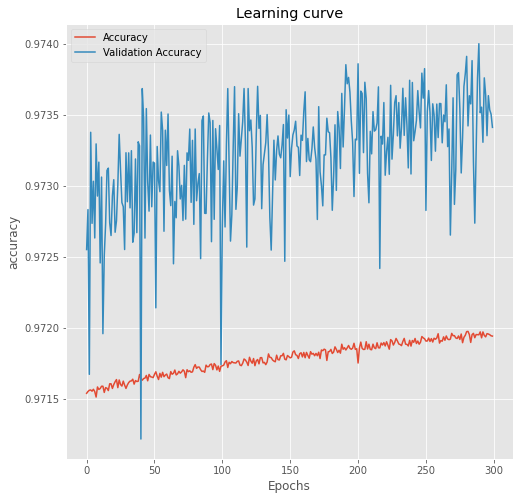

In [22]:
# Modifying the code for a single output
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
# Assuming results.history['loss'] and results.history['val_loss'] correspond to the single output loss
plt.plot(results.history["accuracy"], label="Accuracy")
plt.plot(results.history["val_accuracy"], label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


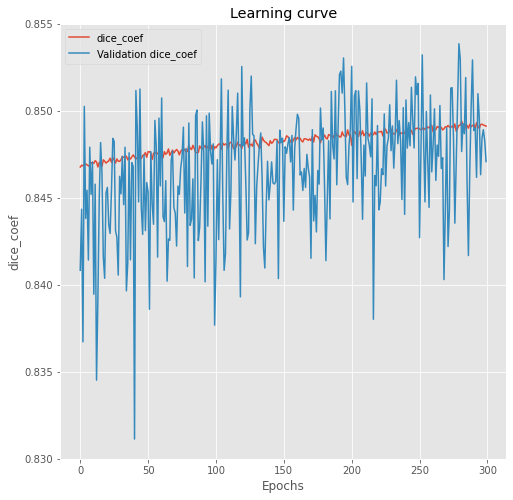

In [23]:
# Modifying the code for a single output
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
# Assuming results.history['loss'] and results.history['val_loss'] correspond to the single output loss
plt.plot(results.history["dice_coef"], label="dice_coef")
plt.plot(results.history["val_dice_coef"], label="Validation dice_coef")

plt.xlabel("Epochs")
plt.ylabel("dice_coef")
plt.legend()
plt.show()

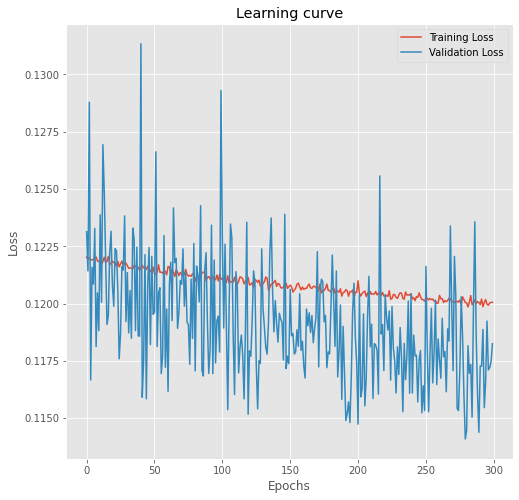

In [24]:
# Modifying the code for a single output
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
# Assuming results.history['loss'] and results.history['val_loss'] correspond to the single output loss
plt.plot(results.history["loss"], label="Training Loss")
plt.plot(results.history["val_loss"], label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [25]:
def evaluate_metrics(y_test, y_pred):
    n = y_pred.shape[0]
    all_F1_score = np.zeros(n)
    all_dice = np.zeros(n)
    all_jaccard = np.zeros(n)
    all_sensitivity = np.zeros(n)
    all_specificity = np.zeros(n)
    for i in range(n):
        gt, pred = y_test[i], y_pred[i]
        gt_flt = np.ndarray.flatten(gt)
        pred_flt = np.ndarray.flatten(pred)

        precisions, recalls, thresholds = precision_recall_curve(gt_flt, pred_flt)
        f1 = 2*(precisions * recalls) / (precisions + recalls)
        max_value = np.argmax(f1)
        thres = thresholds[max_value]
        pred_mask = (pred_flt >= thres)
        pred_label = pred_mask*1

        tn, fp, fn, tp = confusion_matrix(gt_flt, pred_label).ravel()

        F1_score = tp/(tp+((0.5)*(fp+fn)))
        iou = tp / (tp + fp + fn)
        dice = 2*tp / (2*tp + fp + fn)
        specificity = tn / (tn + fp)
        recall = tp / (tp + fn)

        all_F1_score[i] = F1_score
        all_dice[i] = dice
        all_jaccard[i] = iou
        all_sensitivity[i] = recall
        all_specificity[i] = specificity

        print(' F1_score: {:4f}, Dice: {:4f}, Jaccard: {:4f}, Sensitivity: {:4f}, Specificity: {:4f}'.format(
        np.nanmean(all_F1_score), np.nanmean(all_dice), np.nanmean(all_jaccard), np.nanmean(all_sensitivity), np.nanmean(all_specificity)
        ))
    return all_F1_score, all_dice, all_jaccard, all_sensitivity, all_specificity


In [26]:
# model.save_weights('/homes/imransharif/Mehwish/DRIVE/AV_weights/FR_UNet_RAAM_DRIVE.h5')

In [27]:
# valid_data = '/content/ISIC2018_256x256/test' #data path
X_test, y_test = get_data(valid_data)

Getting and resizing images ... 
Done!


In [28]:
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

def evaluate_metrics(y_test, y_pred, return_mode='all'):
    n = y_pred.shape[0]
    all_accuracy = np.zeros(n)
    all_dice = np.zeros(n)
    all_jaccard = np.zeros(n)
    all_sensitivity = np.zeros(n)
    all_specificity = np.zeros(n)
    for i in range(n):
        gt, pred = y_test[i], y_pred[i]
        gt_flt = np.ndarray.flatten(gt)
        pred_flt = np.ndarray.flatten(pred)

        precisions, recalls, thresholds = precision_recall_curve(gt_flt, pred_flt)
        f1 = 2*(precisions * recalls) / (precisions + recalls)
        max_value = np.argmax(f1)
        precision, recall, thres = precisions[max_value], recalls[max_value], thresholds[max_value]

        maxval = 255
        pred_mask = (pred_flt > thres)
        pred_label = pred_mask*1

        tn, fp, fn, tp = confusion_matrix(gt_flt, pred_label).ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        iou = tp / (tp + fp + fn)
        dice = 2*tp / (2*tp + fp + fn)
        specificity = tn / (tn + fp)

        all_accuracy[i] = accuracy
        all_dice[i] = dice
        all_jaccard[i] = iou
        all_sensitivity[i] = recall
        all_specificity[i] = specificity

    print('Accuracy: {:4f}, Dice: {:4f}, Jaccard: {:4f}, Sensitivity: {:4f}, Specificity: {:4f}'.format(
        np.nanmean(all_accuracy), np.nanmean(all_dice), np.nanmean(all_jaccard), np.nanmean(all_sensitivity), np.nanmean(all_specificity)
    ))
    if return_mode == 'all':
        return all_accuracy, all_dice, all_jaccard, all_sensitivity, all_specificity
    if return_mode == 'value':
        return np.nanmean(all_accuracy), np.nanmean(all_dice), np.nanmean(all_jaccard), np.nanmean(all_sensitivity), np.nanmean(all_specificity)
    else:
        return 'No val returned'

In [29]:
# Convert ground truth labels to binary
y_test_BV = (y_test[0] > 0.5).astype(np.uint8)
# y_test_OD = (y_test[1] > 0.5).astype(np.uint8)

y_pred = model.predict(X_test, batch_size =1 ,verbose=1)

# y_pred = model.predict(X_test)
# evl = evaluate_metrics(y_test_BV, y_pred, return_mode='all')

32/32 [==============================] - 2s 12ms/step


In [30]:
save_dir = ''
os.makedirs(save_dir, exist_ok=True)
for i in range(len(y_pred)):
    plt.imsave("/"+str(i+1)+"_Pred.png",y_pred[i,:,:,0],cmap='gray') # binary segmenation
    plt.imsave("/"+str(i+1)+"_GT.png",y_test[i,:,:,0],cmap='gray') # binary segmenation 

In [31]:
# Convert model's outputs to binary
predictions_BV = (y_pred[0] > 0.5).astype(np.uint8)
# predictions_OD = (predictions[1] > 0.5).astype(np.uint8)



In [33]:
memory_usage = model.count_params() * 4  # Assuming float32 data type (4 bytes per parameter)
print("Memory Usage: {:.2f} MB".format(memory_usage / 1024 / 1024))  # Divide by 1024 twice to convert from bytes to KB, then KB to MB


Memory Usage: 0.66 MB


In [34]:
  !pip install keras-flops
  from keras_flops import get_flops

  flops = get_flops(model)
  print(f"FLOPs: {flops / 10**9:.03} G")

Defaulting to user installation because normal site-packages is not writeable


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model g

In [35]:
test_image = load_img('/homes/imransharif/Mehwish/Year 3/Skip_Connection_Aggregation/Combined_dataset/Test/Images/1_folder1.png.png', target_size=(512, 512))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)
# Scale the pixel values to [0, 1] range
test_image = test_image / 255.

preds_test = model.predict(test_image)
end_time = time.time()



le:
node name | # float_ops
_TFProfRoot (--/10.55b flops)
  model/conv2d_35/Conv2D (1.21b/1.21b flops)
  model/conv2d_36/Conv2D (1.21b/1.21b flops)
  model/conv2d_39/Conv2D (1.21b/1.21b flops)
  model/conv2d_40/Conv2D (1.21b/1.21b flops)
  model/conv2d_16/Conv2D (603.98m/603.98m flops)
  model/conv2d_13/Conv2D (301.99m/301.99m flops)
  model/conv2d_15/Conv2D (301.99m/301.99m flops)
  model/conv2d_3/Conv2D (301.99m/301.99m flops)
  model/conv2d_31/Conv2D (301.99m/301.99m flops)
  model/conv2d_32/Conv2D (301.99m/301.99m flops)
  model/conv2d_33/Conv2D (301.99m/301.99m flops)
  model/conv2d_37/Conv2D (301.99m/301.99m flops)
  model/conv2d_41/Conv2D (301.99m/301.99m flops)
  model/conv2d_8/Conv2D (301.99m/301.99m flops)
  model/conv2d_19/Conv2D (209.72m/209.72m flops)
  model/conv2d_11/Conv2D (150.99m/150.99m flops)
  model/conv2d_12/Conv2D (150.99m/150.99m flops)
  model/conv2d_6/Conv2D (150.99m/150.99m flops)
  model/conv2d_7/Conv2D (150.99m/150.99m flops)
  model/conv2d_34/Conv2D (134.2

FileNotFoundError: [Errno 2] No such file or directory: '/homes/imransharif/Mehwish/Year 3/Skip_Connection_Aggregation/Combined_dataset/Test/Images/1_folder1.png.png'

In [ ]:
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow((test_image[0]))
ax[0].axis('off')
ax[1].imshow(np.squeeze(preds_test[0]), cmap='gray') # squeeze out unnecessary dimensions
ax[1].axis('off')
ax[2].imshow(np.squeeze(preds_test[0]), cmap='gray')
ax[2].axis('off')
